In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import KFold

import statsmodels.api as sm
from statsmodels.regression.linear_model import OLS

#from pandas.core import datetools

import seaborn as sns

%matplotlib inline

In [2]:
bikes_main = pd.read_csv("https://raw.githubusercontent.com/mohitroy2502/Forecasting-Bike-Sharing-Usage/master/bikes_student.csv")
bikes_test = pd.read_csv("https://raw.githubusercontent.com/mohitroy2502/Forecasting-Bike-Sharing-Usage/master/bikes_test.csv")

Explore the data

In [3]:
bikes_main.columns.values

array(['Unnamed: 0', 'dteday', 'hour', 'year', 'holiday', 'workingday',
       'temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered',
       'counts', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sept',
       'Oct', 'Nov', 'Dec', 'spring', 'summer', 'fall', 'Mon', 'Tue',
       'Wed', 'Thu', 'Fri', 'Sat', 'Cloudy', 'Snow', 'Storm', 'month'],
      dtype=object)

In [4]:
bikes_main.shape

(1250, 37)

In [5]:
bikes_main.head()

,Unnamed: 0,dteday,hour,year,holiday,workingday,temp,atemp,hum,windspeed,...,Mon,Tue,Wed,Thu,Fri,Sat,Cloudy,Snow,Storm,month
0,5887,2011-09-07,19,0,0,1,0.64,0.5758,0.89,0.0000,...,0,0,1,0,0,0,1,0,0,9
1,10558,2012-03-21,1,1,0,1,0.52,0.5000,0.83,0.0896,...,0,0,1,0,0,0,0,0,0,3
2,14130,2012-08-16,23,1,0,1,0.70,0.6515,0.54,0.1045,...,0,0,0,1,0,0,0,0,0,8
3,2727,2011-04-28,13,0,0,1,0.62,0.5758,0.83,0.2985,...,0,0,0,1,0,0,1,0,0,4
4,8716,2012-01-04,0,1,0,1,0.08,0.0606,0.42,0.3284,...,0,0,1,0,0,0,0,0,0,1


In [6]:
bikes_main.describe()

,Unnamed: 0,hour,year,holiday,workingday,temp,atemp,hum,windspeed,casual,...,Mon,Tue,Wed,Thu,Fri,Sat,Cloudy,Snow,Storm,month
count,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000,1250.00000,1250.000000,1250.000000,...,1250.000000,1250.000000,1250.00000,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000,1250.0,1250.000000
mean,8789.895200,11.410400,0.514400,0.030400,0.675200,0.494160,0.473600,0.63844,0.197306,36.050400,...,0.140800,0.141600,0.15520,0.138400,0.129600,0.148000,0.276800,0.086400,0.0,6.533600
std,4938.433417,6.885456,0.499993,0.171754,0.468488,0.192529,0.171707,0.18818,0.123924,50.958026,...,0.347954,0.348779,0.36224,0.345458,0.335997,0.355242,0.447596,0.281066,0.0,3.441503
min,8.000000,0.000000,0.000000,0.000000,0.000000,0.040000,0.060600,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.000000
25%,4551.750000,5.000000,0.000000,0.000000,0.000000,0.340000,0.333300,0.50000,0.104500,3.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,4.000000
50%,8837.500000,11.000000,1.000000,0.000000,1.000000,0.500000,0.484800,0.65000,0.194000,15.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,7.000000
75%,13075.250000,17.000000,1.000000,0.000000,1.000000,0.660000,0.621200,0.80000,0.283600,50.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000,0.000000,0.0,10.000000
max,17364.000000,23.000000,1.000000,1.000000,1.000000,0.940000,0.909100,1.00000,0.850700,362.000000,...,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,12.000000


Split the dataset

Split the data (1250 rows) into a training (80%) and a validation set (20%).

In [7]:
try:
    bikes_train, bikes_val = train_test_split(bikes_main, test_size = 0.2, random_state = 90, stratify=bikes_main['month'])
except:
    # Drop missing lines
    print("Lines with missing values dropped")
    bikes_main = bikes_main.dropna(subset=['month'])
    bikes_train, bikes_val = train_test_split(bikes_main, test_size = 0.2, random_state = 90, stratify=bikes_main['month'])

Verify that each month is represented equally within each set: ca 83 rows per month in the training set and ca. 21 rows per month in the validation set.

In [8]:
bikes_train.shape

(1000, 37)

In [9]:
bikes_train.groupby(['month']).count().dteday

month
1     82
2     78
3     85
4     82
5     86
6     83
7     86
8     85
9     82
10    83
11    82
12    86
Name: dteday, dtype: int64

In [10]:
bikes_val.groupby(['month']).count().dteday

month
1     21
2     19
3     21
4     21
5     21
6     21
7     21
8     21
9     21
10    21
11    21
12    21
Name: dteday, dtype: int64

Drop columns

Function that takes a data frame and a list of columns as parameters, and return a new dataframe where the columns have been dropped.

In [11]:
def drop_columns(df, cols):
    for col in cols:
        if col in df:
            df = df.drop(columns = [col])
    return df

Test the function on the train data set and create response and predictor data frames

In [12]:
cols_to_drop = ['counts', 'registered', 'casual', 'workingday', 'month', 'dteday']
practice_y_train = drop_columns(bikes_train, bikes_train.columns.difference(['counts']))
practice_X_train = drop_columns(bikes_train, cols_to_drop)

Explore the response and predictor data frames ad verify that the specified columns have been correctly dropped

In [13]:
practice_y_train.head()

,counts
540,111
367,170
869,16
216,24
238,306


In [14]:
practice_X_train.head()

,Unnamed: 0,hour,year,holiday,temp,atemp,hum,windspeed,Feb,Mar,...,fall,Mon,Tue,Wed,Thu,Fri,Sat,Cloudy,Snow,Storm
540,15762,23,1,0,0.54,0.5152,0.73,0.1045,0,0,...,1,0,1,0,0,0,0,0,0,0
367,4213,11,0,0,0.76,0.6667,0.35,0.2239,0,0,...,0,0,0,1,0,0,0,0,0,0
869,14301,2,1,0,0.66,0.6212,0.69,0.0000,0,0,...,0,0,0,0,0,1,0,0,0,0
216,15900,5,1,0,0.30,0.3030,0.81,0.1343,0,0,...,1,0,0,1,0,0,0,1,0,0
238,14320,21,1,0,0.70,0.6515,0.61,0.1642,0,0,...,0,0,0,0,0,1,0,1,0,0


In [15]:
practice_X_train.columns.values

array(['Unnamed: 0', 'hour', 'year', 'holiday', 'temp', 'atemp', 'hum',
       'windspeed', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug',
       'Sept', 'Oct', 'Nov', 'Dec', 'spring', 'summer', 'fall', 'Mon',
       'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Cloudy', 'Snow', 'Storm'],
      dtype=object)

The function will be used to standardize predictors prior to regularization.

In [16]:
def standardize_columns(df, cols, scaler):
    df_copy = df.copy()
    df_copy[cols] = scaler.transform(df_copy[cols])
    return df_copy

In [17]:
binary_columns = ['holiday','Feb', 'Mar', 'Apr',
       'May', 'Jun', 'Jul', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec', 'spring',
       'summer', 'fall', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat',
       'Cloudy', 'Snow', 'Storm']
continuous_columns = practice_X_train.columns.difference(binary_columns)
scaler = StandardScaler().fit(practice_X_train[continuous_columns])

practice_X_train_scaled = standardize_columns(practice_X_train.astype(float), continuous_columns, scaler)

Verify if the continuous predictors have mean 0 (almost) and standard deviation 1

In [18]:
practice_X_train_scaled[continuous_columns].describe()

,Unnamed: 0,atemp,hour,hum,temp,windspeed,year
count,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03
mean,1.565414e-16,-1.256772e-16,-1.994516e-16,5.995204e-17,3.019807e-17,1.301181e-16,2.686740e-17
std,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00
min,-1.765728e+00,-2.402605e+00,-1.646163e+00,-3.397602e+00,-2.347976e+00,-1.554205e+00,-1.018165e+00
25%,-8.741577e-01,-8.121270e-01,-9.189949e-01,-7.421467e-01,-7.922693e-01,-7.231056e-01,-1.018165e+00
50%,1.003020e-02,7.147176e-02,-4.639332e-02,5.448995e-02,3.744066e-02,-1.130295e-02,9.821591e-01
75%,8.831449e-01,8.670022e-01,8.262083e-01,8.511266e-01,8.671507e-01,4.634972e-01,9.821591e-01
max,1.744529e+00,2.546131e+00,1.698810e+00,1.913309e+00,2.319143e+00,5.211499e+00,9.821591e-01


Verify scaling on validation set

In [19]:
standardize_columns(bikes_val, continuous_columns, scaler).describe()

,Unnamed: 0,hour,year,holiday,workingday,temp,atemp,hum,windspeed,casual,...,Mon,Tue,Wed,Thu,Fri,Sat,Cloudy,Snow,Storm,month
count,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,...,250.00000,250.000000,250.00000,250.000000,250.000000,250.000000,250.000000,250.000000,250.0,250.0000
mean,0.052068,0.066463,0.054009,0.044000,0.652000,0.035781,0.030762,-0.034521,0.074947,37.744000,...,0.13200,0.116000,0.12800,0.180000,0.140000,0.140000,0.264000,0.104000,0.0,6.5360
std,0.992869,1.005123,0.999567,0.205507,0.477292,0.991393,1.006891,0.996533,0.922962,52.363942,...,0.33917,0.320867,0.33476,0.384958,0.347683,0.347683,0.441684,0.305873,0.0,3.4491
min,-1.759660,-1.646163,-1.018165,0.000000,0.000000,-2.140548,-2.402605,-3.397602,-1.554205,0.000000,...,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.0000
25%,-0.809539,-0.773561,-1.018165,0.000000,0.000000,-0.792269,-0.812127,-0.795256,-0.723106,4.000000,...,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,4.0000
50%,0.062009,0.099040,0.982159,0.000000,1.000000,0.141154,0.160123,-0.051728,-0.011303,19.000000,...,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,7.0000
75%,0.856852,0.971642,0.982159,0.000000,1.000000,0.867151,0.867002,0.784740,0.701295,51.500000,...,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000,0.000000,0.0,9.7500
max,1.743922,1.698810,0.982159,1.000000,1.000000,2.111716,2.192692,1.913309,3.075296,307.000000,...,1.00000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,12.0000


Higher-oder function

Function that takes a dataframe, a list of columns and a polynomial degree, and creates higher order features for the given columns.

In [20]:
def create_higher_order(df, cols, degree):
    df_copy = df.copy()
    for col in cols:
        for order in range(2, degree + 1):
            col_name = col + '^' + str(order)
            if not col_name in df:
                df_copy[col_name] = df[col] ** order
    return df_copy

In [21]:
practice_X_train_poly = create_higher_order(practice_X_train_scaled, ['temp', 'atemp', 'hum', 'windspeed', 'hour'], 3)

In [22]:
new_cols = practice_X_train_poly.columns.difference(list(practice_X_train.columns))
new_cols

Index(['atemp^2', 'atemp^3', 'hour^2', 'hour^3', 'hum^2', 'hum^3', 'temp^2',
       'temp^3', 'windspeed^2', 'windspeed^3'],
      dtype='object')

In [23]:
practice_X_train_poly[new_cols].head()

,atemp^2,atemp^3,hour^2,hour^3,hum^2,hum^3,temp^2,temp^3,windspeed^2,windspeed^3
540,0.061889,0.015396,2.885955,4.902689,0.229789,0.110152,0.059960,0.014682,0.522882,-0.378099
367,1.282270,1.452008,0.002152,-0.000100,2.367854,-3.643615,1.920218,2.660884,0.051300,0.011619
869,0.751693,0.651719,1.836827,-2.489443,0.071250,0.019018,0.751950,0.652054,2.415552,-3.754263
216,0.977818,-0.966912,0.844552,-0.776139,0.817642,0.739341,0.999394,-0.999091,0.236296,-0.114864
238,1.089356,1.136984,1.982303,2.790969,0.024947,-0.003940,1.154718,1.240835,0.061656,-0.015309


Interaction terms function

Function takes a dataframe, a list of continuous predictors, a list of time-related predictors; and returns a new dataframe augmented with interaction terms between each of the continuous predictors and each of the time-related predictors

In [24]:
def create_interaction_terms(df, cols_continuous = ['temp', 'atemp', 'hum', 'windspeed'], 
                             cols_time = ['Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec', 
                                          'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat']):
    df_copy = df.copy()
    for colc in cols_continuous:
        for colb in cols_time:
            col_name = colc + '*' + colb
            if not col_name in df_copy:
                df_copy[col_name] = df_copy[colc] * df_copy[colb]
    return df_copy

Create interaction terms between countinuous predictors and months/weekday

In [25]:
practice_X_train_poly_inter = create_interaction_terms(practice_X_train_poly)

Verify the new interaction terms

In [26]:
new_cols = practice_X_train_poly_inter.columns.difference(list(practice_X_train_poly.columns))
new_cols

Index(['atemp*Apr', 'atemp*Aug', 'atemp*Dec', 'atemp*Feb', 'atemp*Fri',
       'atemp*Jul', 'atemp*Jun', 'atemp*Mar', 'atemp*May', 'atemp*Mon',
       'atemp*Nov', 'atemp*Oct', 'atemp*Sat', 'atemp*Sept', 'atemp*Thu',
       'atemp*Tue', 'atemp*Wed', 'hum*Apr', 'hum*Aug', 'hum*Dec', 'hum*Feb',
       'hum*Fri', 'hum*Jul', 'hum*Jun', 'hum*Mar', 'hum*May', 'hum*Mon',
       'hum*Nov', 'hum*Oct', 'hum*Sat', 'hum*Sept', 'hum*Thu', 'hum*Tue',
       'hum*Wed', 'temp*Apr', 'temp*Aug', 'temp*Dec', 'temp*Feb', 'temp*Fri',
       'temp*Jul', 'temp*Jun', 'temp*Mar', 'temp*May', 'temp*Mon', 'temp*Nov',
       'temp*Oct', 'temp*Sat', 'temp*Sept', 'temp*Thu', 'temp*Tue', 'temp*Wed',
       'windspeed*Apr', 'windspeed*Aug', 'windspeed*Dec', 'windspeed*Feb',
       'windspeed*Fri', 'windspeed*Jul', 'windspeed*Jun', 'windspeed*Mar',
       'windspeed*May', 'windspeed*Mon', 'windspeed*Nov', 'windspeed*Oct',
       'windspeed*Sat', 'windspeed*Sept', 'windspeed*Thu', 'windspeed*Tue',
       'windspeed*Wed

In [27]:
practice_X_train_poly_inter[new_cols].head()

,atemp*Apr,atemp*Aug,atemp*Dec,atemp*Feb,atemp*Fri,atemp*Jul,atemp*Jun,atemp*Mar,atemp*May,atemp*Mon,...,windspeed*Mar,windspeed*May,windspeed*Mon,windspeed*Nov,windspeed*Oct,windspeed*Sat,windspeed*Sept,windspeed*Thu,windspeed*Tue,windspeed*Wed
540,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,...,-0.0,-0.0,-0.0,-0.0,-0.723106,-0.0,-0.0,-0.0,-0.723106,-0.000000
367,0.0,0.000000,0.0,0.0,0.000000,0.0,1.132373,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.226495
869,0.0,0.867002,0.0,0.0,0.867002,0.0,0.000000,0.0,0.0,0.0,...,-0.0,-0.0,-0.0,-0.0,-0.000000,-0.0,-0.0,-0.0,-0.000000,-0.000000
216,-0.0,-0.000000,-0.0,-0.0,-0.000000,-0.0,-0.000000,-0.0,-0.0,-0.0,...,-0.0,-0.0,-0.0,-0.0,-0.486103,-0.0,-0.0,-0.0,-0.000000,-0.486103
238,0.0,1.043722,0.0,0.0,1.043722,0.0,0.000000,0.0,0.0,0.0,...,-0.0,-0.0,-0.0,-0.0,-0.000000,-0.0,-0.0,-0.0,-0.000000,-0.000000


The function standardizes only the continuous predictors, their corresponding polynomial features and interaction terms are not standardized. Standardizing the predictors would help reduce multicollinearity.

In [28]:
def get_design_mats(train_df, val_df,  degree, 
                    columns_forpoly=['temp', 'atemp', 'hum','windspeed', 'hour'],
                    target_col='counts', 
                    bad_columns=['counts', 'registered', 'casual', 'workingday', 'month', 'dteday']):
    # retrieve response variables
    y_train = train_df[[target_col]]
    y_val = val_df[[target_col]]
    # drop bad variables
    x_train = drop_columns(train_df, bad_columns)
    x_val = drop_columns(val_df, bad_columns)
    # get binary and continuous columns
    binary_columns = ['holiday','Feb', 'Mar', 'Apr',
       'May', 'Jun', 'Jul', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec', 'spring',
       'summer', 'fall', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat',
       'Cloudy', 'Snow', 'Storm']
    continuous_columns = x_train.columns.difference(binary_columns)
    # standardize continuous predictors
    scaler = StandardScaler().fit(x_train[continuous_columns])
    x_train = standardize_columns(x_train, continuous_columns, scaler)
    x_val = standardize_columns(x_val, continuous_columns, scaler)
    # create polynomial terms
    x_train = create_higher_order(x_train, columns_forpoly, degree)
    x_val = create_higher_order(x_val, columns_forpoly, degree)
    # create interaction terms
    x_train = create_interaction_terms(x_train)
    x_val = create_interaction_terms(x_val)
    return x_train, y_train, x_val, y_val

Test the design matrices for train and validation

In [29]:
X_train, y_train, X_val, y_val = get_design_mats(bikes_train, bikes_val, 3)

In [30]:
X_val.describe()

,Unnamed: 0,hour,year,holiday,temp,atemp,hum,windspeed,Feb,Mar,...,windspeed*Sept,windspeed*Oct,windspeed*Nov,windspeed*Dec,windspeed*Mon,windspeed*Tue,windspeed*Wed,windspeed*Thu,windspeed*Fri,windspeed*Sat
count,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.00000,250.000000,...,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000
mean,0.052068,0.066463,0.054009,0.044000,0.035781,0.030762,-0.034521,0.074947,0.07600,0.084000,...,0.003352,-0.023718,-0.014692,0.020918,0.018963,0.032439,-0.004730,-0.002445,0.010335,0.025519
std,0.992869,1.005123,0.999567,0.205507,0.991393,1.006891,0.996533,0.922962,0.26553,0.277944,...,0.226063,0.264793,0.292966,0.304081,0.363190,0.357898,0.313457,0.327324,0.337981,0.388775
min,-1.759660,-1.646163,-1.018165,0.000000,-2.140548,-2.402605,-3.397602,-1.554205,0.00000,0.000000,...,-1.554205,-1.554205,-1.554205,-1.554205,-1.554205,-1.554205,-1.554205,-1.554205,-1.554205,-1.554205
25%,-0.809539,-0.773561,-1.018165,0.000000,-0.792269,-0.812127,-0.795256,-0.723106,0.00000,0.000000,...,-0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,0.000000,-0.000000,0.000000
50%,0.062009,0.099040,0.982159,0.000000,0.141154,0.160123,-0.051728,-0.011303,0.00000,0.000000,...,-0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000,-0.000000,-0.000000
75%,0.856852,0.971642,0.982159,0.000000,0.867151,0.867002,0.784740,0.701295,0.00000,0.000000,...,0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000
max,1.743922,1.698810,0.982159,1.000000,2.111716,2.192692,1.913309,3.075296,1.00000,1.000000,...,1.294596,1.532394,1.532394,2.600496,2.600496,3.075296,1.532394,2.007194,1.769397,3.075296


Check the number of rows in the train and validation sets

In [31]:
X_train.shape, y_train.shape, X_val.shape, y_val.shape

((1000, 109), (1000, 1), (250, 109), (250, 1))

Check the data in the training set

In [32]:
print(y_train.columns.values)
print(X_train.columns.values)

['counts']
['Unnamed: 0' 'hour' 'year' 'holiday' 'temp' 'atemp' 'hum' 'windspeed'
 'Feb' 'Mar' 'Apr' 'May' 'Jun' 'Jul' 'Aug' 'Sept' 'Oct' 'Nov' 'Dec'
 'spring' 'summer' 'fall' 'Mon' 'Tue' 'Wed' 'Thu' 'Fri' 'Sat' 'Cloudy'
 'Snow' 'Storm' 'temp^2' 'temp^3' 'atemp^2' 'atemp^3' 'hum^2' 'hum^3'
 'windspeed^2' 'windspeed^3' 'hour^2' 'hour^3' 'temp*Feb' 'temp*Mar'
 'temp*Apr' 'temp*May' 'temp*Jun' 'temp*Jul' 'temp*Aug' 'temp*Sept'
 'temp*Oct' 'temp*Nov' 'temp*Dec' 'temp*Mon' 'temp*Tue' 'temp*Wed'
 'temp*Thu' 'temp*Fri' 'temp*Sat' 'atemp*Feb' 'atemp*Mar' 'atemp*Apr'
 'atemp*May' 'atemp*Jun' 'atemp*Jul' 'atemp*Aug' 'atemp*Sept' 'atemp*Oct'
 'atemp*Nov' 'atemp*Dec' 'atemp*Mon' 'atemp*Tue' 'atemp*Wed' 'atemp*Thu'
 'atemp*Fri' 'atemp*Sat' 'hum*Feb' 'hum*Mar' 'hum*Apr' 'hum*May' 'hum*Jun'
 'hum*Jul' 'hum*Aug' 'hum*Sept' 'hum*Oct' 'hum*Nov' 'hum*Dec' 'hum*Mon'
 'hum*Tue' 'hum*Wed' 'hum*Thu' 'hum*Fri' 'hum*Sat' 'windspeed*Feb'
 'windspeed*Mar' 'windspeed*Apr' 'windspeed*May' 'windspeed*Jun'
 'windspe

In [33]:
y_val.head()

,counts
469,70
303,343
4,9
895,224
765,5


In [34]:
X_train.describe()

,Unnamed: 0,hour,year,holiday,temp,atemp,hum,windspeed,Feb,Mar,...,windspeed*Sept,windspeed*Oct,windspeed*Nov,windspeed*Dec,windspeed*Mon,windspeed*Tue,windspeed*Wed,windspeed*Thu,windspeed*Fri,windspeed*Sat
count,1.000000e+03,1.000000e+03,1.000000e+03,1000.000000,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,1.565414e-16,-1.994516e-16,2.686740e-17,0.027000,3.019807e-17,-1.256772e-16,5.995204e-17,1.301181e-16,0.078000,0.085000,...,-0.014081,-0.014803,0.001709,-0.017209,-0.013921,-0.013266,0.004386,-0.011268,0.001801,0.017336
std,1.000500e+00,1.000500e+00,1.000500e+00,0.162164,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,0.268306,0.279021,...,0.242928,0.281089,0.288773,0.310498,0.370430,0.346023,0.403203,0.312060,0.376432,0.428265
min,-1.765728e+00,-1.646163e+00,-1.018165e+00,0.000000,-2.347976e+00,-2.402605e+00,-3.397602e+00,-1.554205e+00,0.000000,0.000000,...,-1.554205,-1.554205,-1.554205,-1.554205,-1.554205,-1.554205,-1.554205,-1.554205,-1.554205,-1.554205
25%,-8.741577e-01,-9.189949e-01,-1.018165e+00,0.000000,-7.922693e-01,-8.121270e-01,-7.421467e-01,-7.231056e-01,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000
50%,1.003020e-02,-4.639332e-02,9.821591e-01,0.000000,3.744066e-02,7.147176e-02,5.448995e-02,-1.130295e-02,0.000000,0.000000,...,-0.000000,0.000000,-0.000000,-0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000
75%,8.831449e-01,8.262083e-01,9.821591e-01,0.000000,8.671507e-01,8.670022e-01,8.511266e-01,4.634972e-01,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000
max,1.744529e+00,1.698810e+00,9.821591e-01,1.000000,2.319143e+00,2.546131e+00,1.913309e+00,5.211499e+00,1.000000,1.000000,...,2.600496,2.600496,2.837498,3.312298,4.143398,2.600496,2.600496,3.668597,3.312298,3.668597


In [35]:
X_train.head()

,Unnamed: 0,hour,year,holiday,temp,atemp,hum,windspeed,Feb,Mar,...,windspeed*Sept,windspeed*Oct,windspeed*Nov,windspeed*Dec,windspeed*Mon,windspeed*Tue,windspeed*Wed,windspeed*Thu,windspeed*Fri,windspeed*Sat
540,1.420524,1.698810,0.982159,0,0.244868,0.248775,0.479363,-0.723106,0,0,...,-0.0,-0.723106,-0.0,-0.0,-0.0,-0.723106,-0.000000,-0.0,-0.000000,-0.0
367,-0.915265,-0.046393,-1.018165,0,1.385719,1.132373,-1.538783,0.226495,0,0,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.226495,0.0,0.000000,0.0
869,1.125036,-1.355296,0.982159,0,0.867151,0.867002,0.266926,-1.554205,0,0,...,-0.0,-0.000000,-0.0,-0.0,-0.0,-0.000000,-0.000000,-0.0,-1.554205,-0.0
216,1.448435,-0.918995,0.982159,0,-0.999697,-0.988847,0.904236,-0.486103,0,0,...,-0.0,-0.486103,-0.0,-0.0,-0.0,-0.000000,-0.486103,-0.0,-0.000000,-0.0
238,1.128879,1.407943,0.982159,0,1.074578,1.043722,-0.157946,-0.248305,0,0,...,-0.0,-0.000000,-0.0,-0.0,-0.0,-0.000000,-0.000000,-0.0,-0.248305,-0.0


In [36]:
print(y_val.columns.values)
print(X_val.columns.values)

['counts']
['Unnamed: 0' 'hour' 'year' 'holiday' 'temp' 'atemp' 'hum' 'windspeed'
 'Feb' 'Mar' 'Apr' 'May' 'Jun' 'Jul' 'Aug' 'Sept' 'Oct' 'Nov' 'Dec'
 'spring' 'summer' 'fall' 'Mon' 'Tue' 'Wed' 'Thu' 'Fri' 'Sat' 'Cloudy'
 'Snow' 'Storm' 'temp^2' 'temp^3' 'atemp^2' 'atemp^3' 'hum^2' 'hum^3'
 'windspeed^2' 'windspeed^3' 'hour^2' 'hour^3' 'temp*Feb' 'temp*Mar'
 'temp*Apr' 'temp*May' 'temp*Jun' 'temp*Jul' 'temp*Aug' 'temp*Sept'
 'temp*Oct' 'temp*Nov' 'temp*Dec' 'temp*Mon' 'temp*Tue' 'temp*Wed'
 'temp*Thu' 'temp*Fri' 'temp*Sat' 'atemp*Feb' 'atemp*Mar' 'atemp*Apr'
 'atemp*May' 'atemp*Jun' 'atemp*Jul' 'atemp*Aug' 'atemp*Sept' 'atemp*Oct'
 'atemp*Nov' 'atemp*Dec' 'atemp*Mon' 'atemp*Tue' 'atemp*Wed' 'atemp*Thu'
 'atemp*Fri' 'atemp*Sat' 'hum*Feb' 'hum*Mar' 'hum*Apr' 'hum*May' 'hum*Jun'
 'hum*Jul' 'hum*Aug' 'hum*Sept' 'hum*Oct' 'hum*Nov' 'hum*Dec' 'hum*Mon'
 'hum*Tue' 'hum*Wed' 'hum*Thu' 'hum*Fri' 'hum*Sat' 'windspeed*Feb'
 'windspeed*Mar' 'windspeed*Apr' 'windspeed*May' 'windspeed*Jun'
 'windspe

In [37]:
y_val.head()

,counts
469,70
303,343
4,9
895,224
765,5


In [38]:
X_val.describe()

,Unnamed: 0,hour,year,holiday,temp,atemp,hum,windspeed,Feb,Mar,...,windspeed*Sept,windspeed*Oct,windspeed*Nov,windspeed*Dec,windspeed*Mon,windspeed*Tue,windspeed*Wed,windspeed*Thu,windspeed*Fri,windspeed*Sat
count,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.00000,250.000000,...,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000
mean,0.052068,0.066463,0.054009,0.044000,0.035781,0.030762,-0.034521,0.074947,0.07600,0.084000,...,0.003352,-0.023718,-0.014692,0.020918,0.018963,0.032439,-0.004730,-0.002445,0.010335,0.025519
std,0.992869,1.005123,0.999567,0.205507,0.991393,1.006891,0.996533,0.922962,0.26553,0.277944,...,0.226063,0.264793,0.292966,0.304081,0.363190,0.357898,0.313457,0.327324,0.337981,0.388775
min,-1.759660,-1.646163,-1.018165,0.000000,-2.140548,-2.402605,-3.397602,-1.554205,0.00000,0.000000,...,-1.554205,-1.554205,-1.554205,-1.554205,-1.554205,-1.554205,-1.554205,-1.554205,-1.554205,-1.554205
25%,-0.809539,-0.773561,-1.018165,0.000000,-0.792269,-0.812127,-0.795256,-0.723106,0.00000,0.000000,...,-0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,0.000000,-0.000000,0.000000
50%,0.062009,0.099040,0.982159,0.000000,0.141154,0.160123,-0.051728,-0.011303,0.00000,0.000000,...,-0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000,-0.000000,-0.000000
75%,0.856852,0.971642,0.982159,0.000000,0.867151,0.867002,0.784740,0.701295,0.00000,0.000000,...,0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000
max,1.743922,1.698810,0.982159,1.000000,2.111716,2.192692,1.913309,3.075296,1.00000,1.000000,...,1.294596,1.532394,1.532394,2.600496,2.600496,3.075296,1.532394,2.007194,1.769397,3.075296


In [39]:
X_val.head()

,Unnamed: 0,hour,year,holiday,temp,atemp,hum,windspeed,Feb,Mar,...,windspeed*Sept,windspeed*Oct,windspeed*Nov,windspeed*Dec,windspeed*Mon,windspeed*Tue,windspeed*Wed,windspeed*Thu,windspeed*Fri,windspeed*Sat
469,-0.045791,-0.191827,-1.018165,1,-0.792269,-1.076915,-1.167020,2.600496,0,0,...,0.0,0.0,0.000000,2.600496,2.600496,0.0,0.000000,0.000000,0.0,0.0
303,1.103800,0.826208,0.982159,0,0.763437,0.690282,0.744908,-0.723106,0,0,...,-0.0,-0.0,-0.000000,-0.000000,-0.000000,-0.0,-0.000000,-0.000000,-0.0,-0.0
4,-0.004532,-1.646163,0.982159,0,-2.140548,-2.402605,-1.167020,1.057594,0,0,...,0.0,0.0,0.000000,0.000000,0.000000,0.0,1.057594,0.000000,0.0,0.0
895,-0.166939,-0.337261,-1.018165,0,-0.999697,-1.165566,-0.635928,1.057594,0,0,...,0.0,0.0,0.000000,1.057594,0.000000,0.0,0.000000,1.057594,0.0,0.0
765,-0.270087,-1.355296,-1.018165,0,-0.584842,-0.458687,1.594654,-1.554205,0,0,...,-0.0,-0.0,-1.554205,-0.000000,-0.000000,-0.0,-0.000000,-1.554205,-0.0,-0.0


# Part 2: Regularization via Ridge

Polynomial models fitting and validation

For each polynomial degree, we compute the design matrices and fit a polynomial linear regression on the training dataset. We use the model to predict the counts on the validation dataset. The R^2 score is returned not only for the validation dataset but also for the training dataset. We return the coefficients variance and the model with best validation R2 score as well.

The following function performs the above steps for a given max_degree.

In [40]:
def poly_fit(max_degree = 8):
    r2_scores_val = []
    r2_scores_train = []
    coefs_var = []
    residuals = []
    poly_degrees = range(1,max_degree + 1)
    best_model = None
    best_score_dict = {"degree": 1, "score": 0}
    for degree in poly_degrees:
        # build the design matrices
        X_train, y_train, X_val, y_val = get_design_mats(bikes_train, bikes_val, degree)
        # fit a regression model on training data
        model = LinearRegression().fit(X_train.values, y_train.values)
        # predict on training data
        y_train_predict_ols = model.predict(X_train.values)
        # predict on validation data
        y_val_predict_ols = model.predict(X_val.values)
        # calculate R2 score
        r2_train = r2_score(y_train.values, y_train_predict_ols)
        r2_scores_train.append(r2_train)
        r2_val = r2_score(y_val.values, y_val_predict_ols)
        r2_scores_val.append(r2_val)
        # calculate coefficients variance
        coefs_var.append(np.var(model.coef_))
        # calculate residuals on validation data
        residuals.append(y_val.values - y_val_predict_ols)
        if r2_val > best_score_dict['score']:
            best_score_dict = dict({"degree": degree, "score": r2_val, "predictors": X_train.columns.values})
            best_model = model
    df_scores = pd.DataFrame(dict({"poly_degrees": poly_degrees, 
                              "r2_scores_val": r2_scores_val,
                              "r2_scores_train": r2_scores_train,
                              "coefs_variance": coefs_var,
                              "residuals": residuals}))
    df_scores.poly_degrees = df_scores.poly_degrees.astype('int')
    return df_scores, best_score_dict, best_model

In [41]:
df_poly_scores, best_poly_score_info, best_poly_model = poly_fit(8)

In [42]:
df_poly_scores[['poly_degrees', 'r2_scores_val', 'coefs_variance']]

,poly_degrees,r2_scores_val,coefs_variance
0,1,0.327885,28185.343074
1,2,0.442160,34797.751920
2,3,0.452187,26138.993313
3,4,0.435845,19873.287230
4,5,0.468874,18122.524965
5,6,0.470619,18289.881773
6,7,0.531321,22674.260515
7,8,0.549918,27673.074923


We now plot how the R2 score and variance change with increasing model complexity (polynomial order).

In [43]:
def poly_scores_plot(df):
    fig, ax = plt.subplots(1,3, figsize=(18,6))
    ax[0].plot(df.poly_degrees, df.r2_scores_val, ls='-', marker='o', label = 'validation data')
    ax[0].plot(df.poly_degrees, df.r2_scores_train, ls='-', marker='x', label = 'train data')
    ax[0].set_ylabel('$R^2$ score')
    ax[0].set_xlabel('polynomial degree');
    ax[0].set_title('polynomial models\' score')
    ax[0].legend()
    ax[0].grid()
    ax[1].plot(df.poly_degrees, df.coefs_variance, label = 'normalized variance')
    ax[1].set_ylabel('variance')
    ax[1].set_xlabel('polynomial degree');
    ax[1].set_title('polynomial models\' coefficients variance')
    for degree in range(1, len(df.residuals)+1):
        ax[2].violinplot(df.residuals[degree-1], positions=[degree], 
                  showmeans=True, showmedians=True, showextrema=True, vert=False)
    ax[2].set_ylabel('polynomial degree')
    ax[2].set_xlabel('residuals');
    ax[2].set_title('polynomial models\' residuals distribution')
    ax[2].axvline(x=0, color='black', ls='--', alpha=0.4)

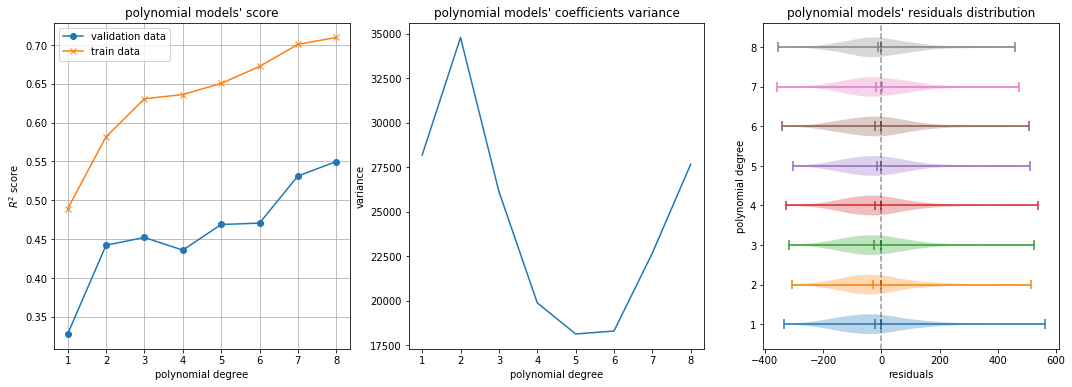

In [44]:
poly_scores_plot(df_poly_scores)

In [45]:
df_poly_scores_18, best_poly_score_info_18, best_poly_model_18 = poly_fit(18)

Best R2 score 0.6246258943600251 obtained with polynomial degree 17 but at the cost of a large variance 104733454.14474775


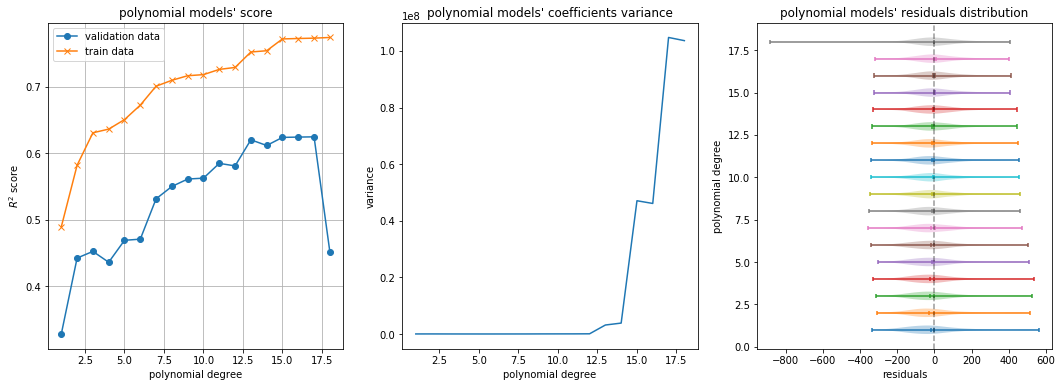

In [46]:
print("Best R2 score " + str(best_poly_score_info_18['score']) + " obtained with polynomial degree " + str(best_poly_score_info_18['degree']) + " but at the cost of a large variance " + str(np.var(best_poly_model_18.coef_)))
poly_scores_plot(df_poly_scores_18)

In [47]:
def ridge_fit(max_degree = 8, lambdas = [0, .01, .05, .1, .5, 1, 5, 10, 50, 100]):
    r2_scores_dict = dict()
    coefs_variance_dict = dict()
    residuals_dict = dict()
    poly_degrees = range(1,max_degree + 1)
    r2_scores_dict['poly_degrees'] = poly_degrees
    coefs_variance_dict['poly_degrees'] = poly_degrees
    residuals_dict['poly_degrees'] = poly_degrees
    best_score_dict = {'degree': 0, 'lambda': 0, 'score': 0}
    best_model = None
    for lamb in lambdas:
        r2_scores_val = [] 
        coefs_variance = []
        residuals = []
        for degree in poly_degrees:
            # build the design matrices
            X_train, y_train, X_val, y_val = get_design_mats(bikes_train, bikes_val, degree)               
            # fit a regularized regression model on training data
            ridge = Ridge(alpha = lamb)
            model = ridge.fit(X_train.values, y_train.values)
            # predict on validation data
            y_val_predict_ols = model.predict(X_val.values) 
            # calculate R2 score   
            r2 = r2_score(y_val.values, y_val_predict_ols)
            r2_scores_val.append(r2)
            # retrieve coefficients
            coefs_variance.append(np.var(model.coef_))
            # calculate residuals
            residuals.append(y_val.values - y_val_predict_ols)
            if (r2 > best_score_dict['score']) & (lamb != 0):
                best_score_dict = {'degree': degree, 'lambda': lamb, 'score': r2, 'predictors': X_train.columns.values}
                best_model = model
        r2_scores_dict[r'$\lambda = ' + str(lamb) + '$'] = r2_scores_val
        coefs_variance_dict[r'$\lambda = ' + str(lamb) + '$'] = coefs_variance
        residuals_dict[r'$\lambda = ' + str(lamb) + '$'] = residuals
    return pd.DataFrame(r2_scores_dict), pd.DataFrame(coefs_variance_dict), pd.DataFrame(residuals_dict), best_score_dict, best_model

In [48]:
df_ridge_scores, df_ridge_coefs_variance, df_ridge_residuals, best_ridge_score_info, best_ridge_model = ridge_fit()

In [49]:
df_ridge_scores

,poly_degrees,$\lambda = 0$,$\lambda = 0.01$,$\lambda = 0.05$,$\lambda = 0.1$,$\lambda = 0.5$,$\lambda = 1$,$\lambda = 5$,$\lambda = 10$,$\lambda = 50$,$\lambda = 100$
0,1,0.332489,0.329861,0.334763,0.337938,0.344999,0.347365,0.350629,0.350649,0.345911,0.341247
1,2,0.447966,0.444404,0.449251,0.452226,0.458584,0.460731,0.463083,0.462184,0.454861,0.449525
2,3,0.448876,0.453978,0.459201,0.463020,0.472682,0.476314,0.483103,0.484761,0.478042,0.465605
3,4,0.435853,0.437696,0.442635,0.446209,0.455806,0.459731,0.467875,0.470487,0.467900,0.460127
4,5,0.468732,0.470532,0.475003,0.478125,0.485769,0.488533,0.493597,0.494937,0.493067,0.489294
5,6,0.470637,0.472295,0.476293,0.479015,0.487006,0.491131,0.499724,0.501811,0.501996,0.497934
6,7,0.531361,0.532810,0.535694,0.537100,0.537040,0.533895,0.518240,0.511517,0.499913,0.494208
7,8,0.549925,0.551196,0.553496,0.554133,0.547940,0.539655,0.514960,0.508253,0.501286,0.498754


In [50]:
def ridge_scores_plot(df_scores, df_coefs_variance):
    lambdas = df_scores.columns.difference(['poly_degrees', '$\lambda = 0$']).values
    fig, ax = plt.subplots(1,2, figsize=(15,6)) 
    for lamb in lambdas:
        ax[0].plot(df_scores.poly_degrees, df_scores[lamb], ls='-', marker='o', markersize=3, label = lamb)
    ax[0].set_ylabel('$R^2$ score')
    ax[0].set_xlabel('polynomial degree');
    ax[0].set_title('Ridge polynomial models\' scores on validation data')
    ax[0].legend()
    ax[0].grid()
    for lamb in lambdas:
        ax[1].plot(df_coefs_variance.poly_degrees, df_coefs_variance[lamb], ls='-', marker='o', markersize=3, label = lamb)
    ax[1].set_ylabel('variance')
    ax[1].set_xlabel('polynomial degree');
    ax[1].set_title('polynomial models\' coefficients variance')
    ax[1].legend()
    ax[1].grid()

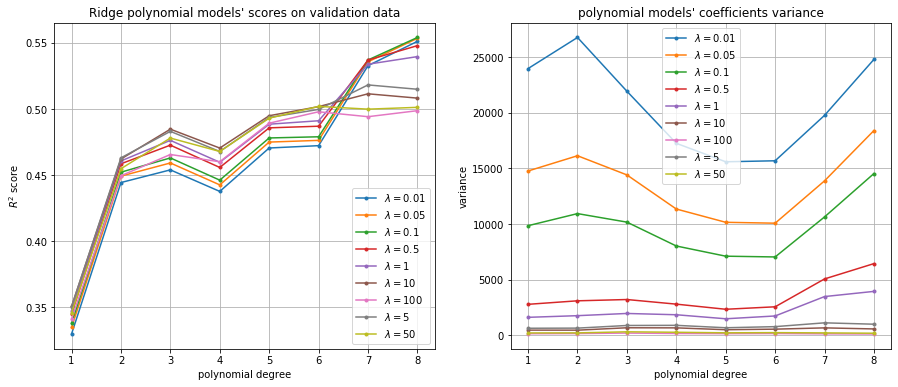

In [51]:
ridge_scores_plot(df_ridge_scores, df_ridge_coefs_variance)

In [52]:
print("The best-scoring degree appears to be " + str(best_ridge_score_info['degree']) + " with Ridge tuning parameter " + str(best_ridge_score_info['lambda']) + ". The corresponding regression model provides predictions with R2 score = " + str(best_ridge_score_info['score']) + " at the cost of a high variance of coefficients estimates " + str(np.var(best_ridge_model.coef_)))

The best-scoring degree appears to be 8 with Ridge tuning parameter 0.1. The corresponding regression model provides predictions with R2 score = 0.5541325326345061 at the cost of a high variance of coefficients estimates 14540.817636091242


In [53]:
df_ridge_coefs_variance

,poly_degrees,$\lambda = 0$,$\lambda = 0.01$,$\lambda = 0.05$,$\lambda = 0.1$,$\lambda = 0.5$,$\lambda = 1$,$\lambda = 5$,$\lambda = 10$,$\lambda = 50$,$\lambda = 100$
0,1,3.557140e+31,23979.048577,14769.367780,9850.010833,2780.513158,1610.902064,628.499336,459.624449,206.035995,136.494575
1,2,7.550896e+30,26774.792757,16139.340004,10936.881381,3095.965434,1759.361566,639.978840,456.002677,211.879593,151.858394
2,3,1.253889e+30,21940.148984,14415.786542,10170.423194,3211.301426,1958.251231,878.067708,671.517325,308.056497,194.692486
3,4,4.976024e+28,17257.862925,11348.360258,8024.230045,2795.926437,1842.236896,890.990944,662.967741,267.601967,157.851098
4,5,2.422695e+27,15596.848075,10155.119494,7108.297156,2335.828435,1480.105481,672.590950,496.738135,218.479252,143.600440
5,6,3.178269e+25,15687.023634,10074.636773,7039.287527,2557.218333,1732.792469,773.484463,546.968885,235.291469,153.827315
6,7,9.706834e+23,19772.000486,13882.763848,10639.051088,5063.469627,3477.762612,1115.474571,662.257595,210.844324,127.865084
7,8,2.217742e+22,24804.306273,18408.024852,14540.817636,6441.162640,3943.597078,992.368341,567.215416,181.737861,113.786225


In [54]:
bikes_test.head()

,Unnamed: 0,dteday,hour,year,holiday,workingday,temp,atemp,hum,windspeed,...,Mon,Tue,Wed,Thu,Fri,Sat,Cloudy,Snow,Storm,month
0,7955,2011-12-03,3,0,0,0,0.24,0.2424,0.70,0.1343,...,0,0,0,0,0,1,0,0,0,12
1,113,2011-01-05,22,0,0,1,0.18,0.1970,0.55,0.1343,...,0,0,1,0,0,0,0,0,0,1
2,701,2011-02-01,14,0,0,1,0.22,0.2576,0.80,0.0896,...,0,1,0,0,0,0,1,0,0,2
3,12221,2012-05-29,10,1,0,1,0.74,0.6970,0.70,0.2985,...,0,1,0,0,0,0,0,0,0,5
4,7255,2011-11-03,22,0,0,1,0.40,0.4091,0.82,0.0000,...,0,0,0,1,0,0,0,0,0,11


Create design matrices for test data

In [55]:
X_train_best, y_train_best, X_test_best, y_test_best = get_design_mats(bikes_train, bikes_test, degree = best_ridge_score_info['degree'])

In [56]:
X_train_best.columns.values

array(['Unnamed: 0', 'hour', 'year', 'holiday', 'temp', 'atemp', 'hum',
       'windspeed', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug',
       'Sept', 'Oct', 'Nov', 'Dec', 'spring', 'summer', 'fall', 'Mon',
       'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Cloudy', 'Snow', 'Storm',
       'temp^2', 'temp^3', 'temp^4', 'temp^5', 'temp^6', 'temp^7',
       'temp^8', 'atemp^2', 'atemp^3', 'atemp^4', 'atemp^5', 'atemp^6',
       'atemp^7', 'atemp^8', 'hum^2', 'hum^3', 'hum^4', 'hum^5', 'hum^6',
       'hum^7', 'hum^8', 'windspeed^2', 'windspeed^3', 'windspeed^4',
       'windspeed^5', 'windspeed^6', 'windspeed^7', 'windspeed^8',
       'hour^2', 'hour^3', 'hour^4', 'hour^5', 'hour^6', 'hour^7',
       'hour^8', 'temp*Feb', 'temp*Mar', 'temp*Apr', 'temp*May',
       'temp*Jun', 'temp*Jul', 'temp*Aug', 'temp*Sept', 'temp*Oct',
       'temp*Nov', 'temp*Dec', 'temp*Mon', 'temp*Tue', 'temp*Wed',
       'temp*Thu', 'temp*Fri', 'temp*Sat', 'atemp*Feb', 'atemp*Mar',
       'atemp*Apr', 'atemp*May', 

In [57]:
ridge = Ridge(alpha = best_ridge_score_info['lambda'])
model = ridge.fit(X_train_best.values, y_train_best.values)

In [58]:
y_test_predict_ridge = model.predict(X_test_best.values)
r2_score_ridge_test = r2_score(y_test_best.values, y_test_predict_ridge)
print("Test score " + str(r2_score_ridge_test))
print("Validation score " + str(best_ridge_score_info['score']))

Test score 0.5699436948192406
Validation score 0.5541325326345061


# Part 3: Comparing Ridge, Lasso, and OLS

Polynomial models fitting and validation

For each polynomial degree, we compute the design matrices and fit a polynomial linear regression on the training dataset. We use the model to predict the counts on the validation dataset. The R^2 score is returned not only for the validation dataset but also for the training dataset. We return the coefficients variance and the model with best validation R2 score as well.

In [59]:
X_train_1, y_train_1, X_val_1, y_val_1 = get_design_mats(bikes_train, bikes_val, degree = 1)
X_train_1, y_train_1, X_test_1, y_test_1 = get_design_mats(bikes_train, bikes_test, degree = 1)

In [60]:
ols_model = LinearRegression().fit(X_train_1.values, y_train_1.values)
y_val_predicted_ols = ols_model.predict(X_val_1.values)
r2_score_val_ols = r2_score(y_val_1.values, y_val_predicted_ols)
y_test_predicted_ols = ols_model.predict(X_test_1.values)
r2_score_test_ols = r2_score(y_test_1.values, y_test_predicted_ols)

In [61]:
from sklearn.model_selection import KFold
alphas_list = (.1,.5,1,5,10,50,100)
splitter = KFold(n_splits = int(X_train_1.shape[0]/20), random_state=42, shuffle=True)

ridge_cv_model = RidgeCV(alphas=alphas_list, cv=splitter, normalize=False)
ridge_cv_model.fit(X_train_1.values, y_train_1.values)

RidgeCV(alphas=array([  0.1,   0.5,   1. ,   5. ,  10. ,  50. , 100. ]),
        cv=KFold(n_splits=50, random_state=42, shuffle=True),
        fit_intercept=True, gcv_mode=None, normalize=False, scoring=None,
        store_cv_values=False)

In [62]:
print("The Ridge tuning parameter for obtained via cross-validation is " + str(ridge_cv_model.alpha_))

The Ridge tuning parameter for obtained via cross-validation is 50.0


Now let's fit a multilinear regression model with Ridge regularization on the whole training training set.

In [63]:
ridge_model = Ridge(alpha = ridge_cv_model.alpha_)
ridge_model.fit(X_train_1.values, y_train_1.values)
y_val_predicted_ridge = ridge_model.predict(X_val_1.values)
r2_score_val_ridge = r2_score(y_val_1.values, y_val_predicted_ridge)
y_test_predicted_ridge = ridge_model.predict(X_test_1.values)
r2_score_test_ridge = r2_score(y_test_1.values, y_test_predicted_ridge)

In [64]:
#Fitting a Lasso Model

lasso_cv_model = LassoCV(alphas=alphas_list, cv=splitter, max_iter = 100000)
lasso_cv_model.fit(X_train_1.values, y_train_1.values)

LassoCV(alphas=(0.1, 0.5, 1, 5, 10, 50, 100), copy_X=True,
        cv=KFold(n_splits=50, random_state=42, shuffle=True), eps=0.001,
        fit_intercept=True, max_iter=100000, n_alphas=100, n_jobs=None,
        normalize=False, positive=False, precompute='auto', random_state=None,
        selection='cyclic', tol=0.0001, verbose=False)

In [65]:
print("The Lasso tuning parameter for obtained via cross-validation is " + str(lasso_cv_model.alpha_))

The Lasso tuning parameter for obtained via cross-validation is 0.5


In [66]:
lasso_model = Lasso(alpha = lasso_cv_model.alpha_)
lasso_model.fit(X_train_1.values, y_train_1.values)
y_val_predicted_lasso = lasso_model.predict(X_val_1.values)
r2_score_val_lasso = r2_score(y_val_1.values, y_val_predicted_lasso)
y_test_predicted_lasso = lasso_model.predict(X_test_1.values)
r2_score_test_lasso = r2_score(y_test_1.values, y_test_predicted_lasso)

In [67]:
pd.DataFrame({'model': ['osl', 'ridge', 'lasso'], 
              'R2 score on val': [r2_score_val_ols, r2_score_val_ridge, r2_score_val_lasso],
              'R2 score on test': [r2_score_test_ols, r2_score_test_ridge, r2_score_test_lasso]})

,model,R2 score on val,R2 score on test
0,osl,0.327885,0.349199
1,ridge,0.345911,0.388850
2,lasso,0.346979,0.373466


### Retrieve model coefficients

In [68]:
#We retrieve predictor coefficients from our OLS model

coefs = pd.DataFrame({'predictors': X_train_1.columns.values, 'ols': ols_model.coef_.ravel()})
coefs.ols = round(coefs.ols.astype('float'), 2)

In [69]:
#We retrieve predictor coefficients from our Ridge model

coefs['ridge'] = ridge_model.coef_.ravel()
coefs.ridge = round(coefs.ridge.astype('float'), 2)

In [70]:
#We retrieve predictor coefficients from our Lasso model

coefs['lasso'] = lasso_model.coef_.ravel()
coefs.lasso = round(coefs.lasso.astype('float'), 2)

In [71]:
coefs.head()

,predictors,ols,ridge,lasso
0,Unnamed: 0,-336.73,26.14,26.33
1,hour,53.19,51.14,52.98
2,year,338.34,17.23,15.76
3,holiday,-15.35,-7.31,-0.00
4,temp,150.39,40.09,73.81


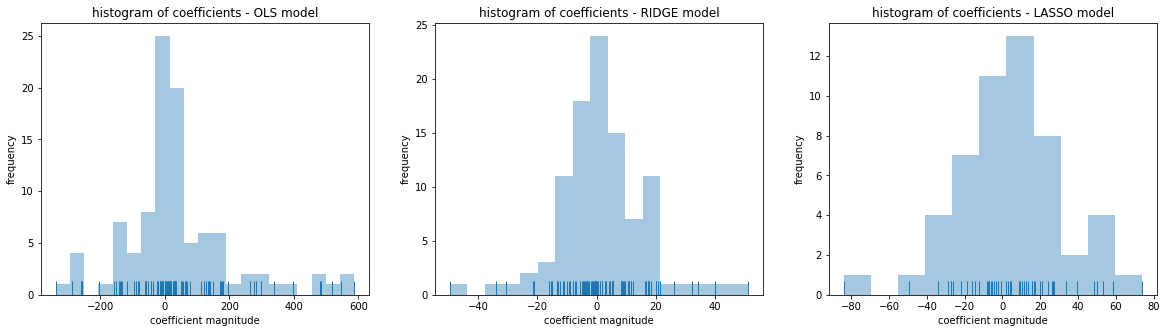

In [72]:
fig, ax = plt.subplots(1,3,figsize=(20,5))
sns.distplot(coefs.ols, rug=True, kde=False, norm_hist=False, ax=ax[0])
ax[0].set_title('histogram of coefficients - OLS model')
ax[0].set_xlabel('coefficient magnitude')
ax[0].set_ylabel('frequency')
sns.distplot(coefs.ridge, rug=True, kde=False, norm_hist=False, ax=ax[1])
ax[1].set_title('histogram of coefficients - RIDGE model')
ax[1].set_xlabel('coefficient magnitude')
ax[1].set_ylabel('frequency')
sns.distplot(coefs.lasso[coefs.lasso!=0], rug=True, kde=False, norm_hist=False, ax=ax[2])
ax[2].set_title('histogram of coefficients - LASSO model')
ax[2].set_xlabel('coefficient magnitude')
ax[2].set_ylabel('frequency')
plt.show()

The histograms show smaller magnitude for regularized coefficients. With the OLS model, coefficients are distributed in a wider values range. Ridge and Lasso models have shrinked coefficients with less variance. Lasso caused a lot of coefficients to be zero (we did not show them in the Lasso histogram in order to keep the remaining distribution visible, the list of zero coefficients is given below).

Outliers coefficient are particularly large in the OLS model. Their magnitude is significantly reduced by Ridge and set to zero by Lasso. Most coefficients are found around zero.

In [73]:
np.var(coefs.ols), np.var(coefs.ridge), np.var(coefs.lasso)

(28185.108916824818, 206.022678073666, 404.5479304152639)

In [74]:
coefs[coefs.lasso==0].predictors.values

array(['holiday', 'windspeed', 'Feb', 'May', 'Jul', 'Aug', 'Nov', 'Dec',
       'summer', 'Mon', 'Fri', 'Sat', 'Storm', 'temp*Feb', 'temp*Mar',
       'temp*Apr', 'temp*May', 'temp*Jun', 'temp*Jul', 'temp*Aug',
       'temp*Oct', 'temp*Nov', 'temp*Dec', 'temp*Fri', 'temp*Sat',
       'atemp*Apr', 'atemp*Jun', 'atemp*Aug', 'atemp*Sept', 'atemp*Oct',
       'atemp*Nov', 'atemp*Dec', 'atemp*Mon', 'atemp*Tue', 'atemp*Wed',
       'atemp*Thu', 'hum*Mar', 'hum*Jun', 'hum*Jul', 'hum*Dec', 'hum*Fri',
       'windspeed*Feb', 'windspeed*Apr', 'windspeed*Dec', 'windspeed*Tue',
       'windspeed*Wed', 'windspeed*Fri'], dtype=object)

In [75]:
coefs['all'] = abs(coefs.ols) + abs(coefs.ridge) + abs(coefs.lasso)
coefs = coefs.sort_values(by = ['all'])

The stacked barplot below shows the magnitude of the coefficients associated with the predictors. The predictors with the cummulative largest coefficient magnitude are displayed at the beginning of the plot. The bar shows the magnitude obtained with each of the three models (OLS - blue, Ridge - orange, Lasso - green).

Bars oriented to the left identify those predictors which have a negative effect on the predicted count of ridership. The remaining ones have a positive effect. A step increase of the later would imply a step increase in the count by the magnitude of the coefficient.

Lasso provides the best interpretability. For example humidity has a considerable impact on ridership during certain months (Sept). High temperature brings definetely more ridership. It is strange that Storm has no effect on the ridership. This is probably because of the lack of data during stormy weather.

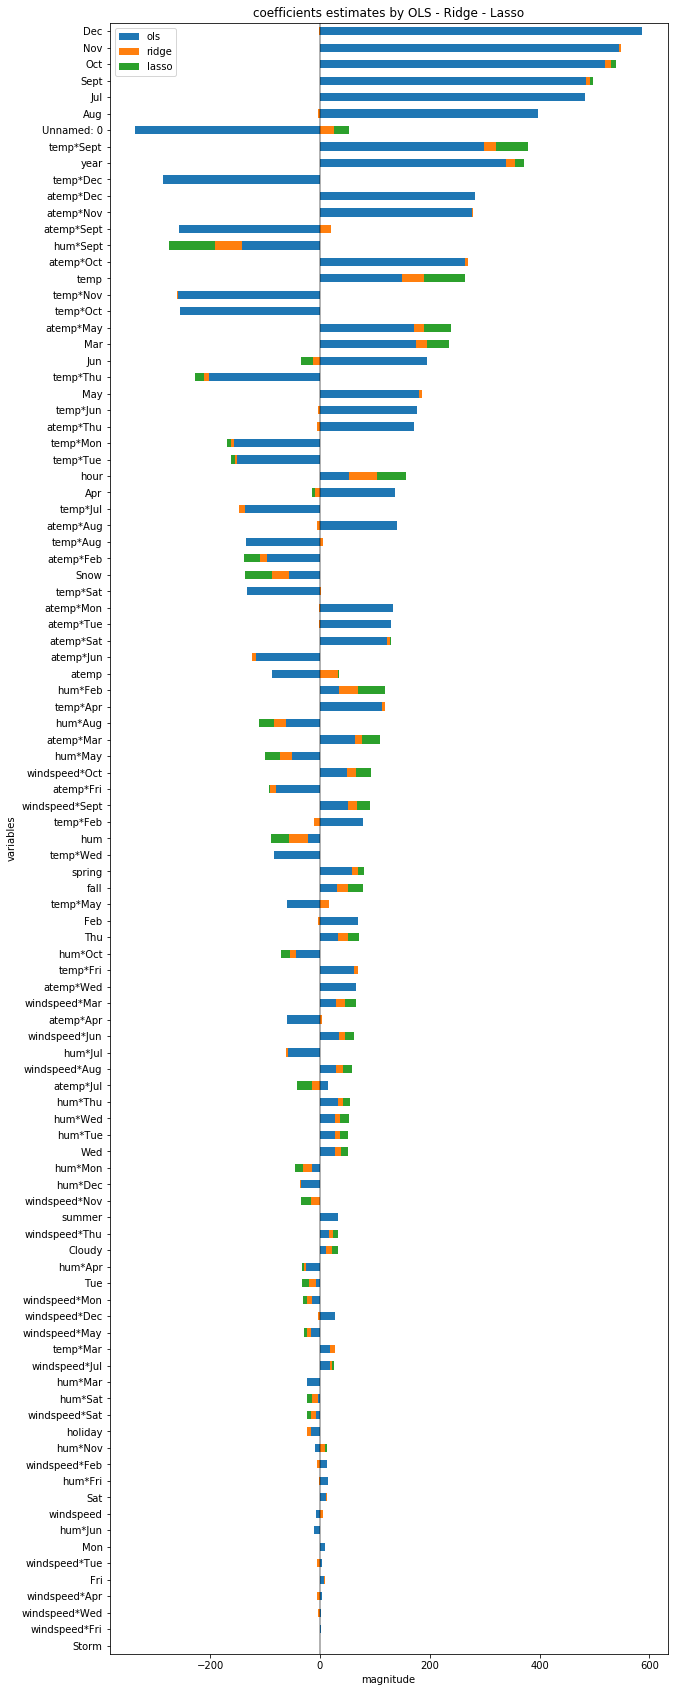

In [76]:
coefs.plot.barh(x='predictors', y=['ols', 'ridge', 'lasso'], stacked=True, legend=True, figsize=(10, 30))
plt.axvline(x=0, color='black', alpha=0.4)
plt.xlabel('magnitude')
plt.ylabel('variables')
plt.title('coefficients estimates by OLS - Ridge - Lasso')
plt.show()

When the coefficient is large, the sign of coefficients appears to be the same regardless the approach used. The coefficients which were set to zero by Lasso tend to be handled differently by Ridge and OLS when it comes to their sign.

OLS handles temp as a positive predictor of ridership, and atemp as a negative predictore of ridership. This is strange because both predictors are positively correlated. We would expect temp and atemp to behave in the same direction. This is not the case for Lasso and Ridge approaches, where both temp and atemp predict an increase in ridership.

Ridge assumes that both temp and atemp would have approximately the same impact on the response. Lasso however seems to have detected the collinearity between both and tried to shrink atemp towards zero.

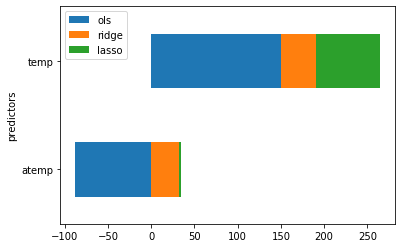

In [77]:
coefs[(coefs.predictors=='temp')|(coefs.predictors=='atemp')].plot.barh(x='predictors', y=['ols', 'ridge', 'lasso'], stacked=True, legend=True, figsize=(6, 4))

In [78]:
pd.DataFrame({"Model": ['original', 'polynomial degree 2', 'polynomial degree 2 with forward selection', 'polynomial degree 6 with int. terms', 'multilinear polynomia degree 8 with inter. terms', 'polynomial degree 8 with Ridge lamba 0.1', 'polynomial degree 1 with inter. terms', 'polynomial degree 1 with inter. terms and Ridge', 'polynomial degree 1 with inter. terms and Lasso'], "Test R2": [0.406, 0.496, 0.445, 0.478, 0.556, 0.556, 0.349, 0.388, 0.383]})

,Model,Test R2
0,original,0.406
1,polynomial degree 2,0.496
2,polynomial degree 2 with forward selection,0.445
3,polynomial degree 6 with int. terms,0.478
4,multilinear polynomia degree 8 with inter. terms,0.556
5,polynomial degree 8 with Ridge lamba 0.1,0.556
6,polynomial degree 1 with inter. terms,0.349
7,polynomial degree 1 with inter. terms and Ridge,0.388
8,polynomial degree 1 with inter. terms and Lasso,0.383
